<a href="https://colab.research.google.com/github/encoras/Artificial-Intelligence-Group/blob/master/MLP_test_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The code is adopted from:


https://python-course.eu/machine-learning/neural-networks-with-scikit.php




Let's do a correct classification


In [51]:
from  sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import metrics
from matplotlib import pyplot as plt
from sklearn.neural_network import MLPClassifier

In [52]:
# Load IRIS
X, y = datasets.load_iris(return_X_y=True)

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6, random_state=123, shuffle=True, stratify=y)

We will create now a **MLPClassifier**.

A few notes on the used parameters:

*hidden_layer_sizes*: `tuple, length` = *n_layers* - 2, default=(100,)
The ith element represents the number of neurons in the ith hidden layer.
(6,) means one hidden layer with 6 neurons.

*solver*:
The weight optimization can be influenced with the solver parameter. Three solver modes are available

'`lbfgs`' - is an optimizer in the family of quasi-Newton methods.

'`sgd`' - refers to stochastic gradient descent.

'`adam`' - refers to a stochastic gradient-based optimizer proposed by Kingma, Diederik, and Jimmy Ba.

Without understanding in the details of the solvers, you should know the following: 'adam' works pretty well - both training time and validation score - on relatively large datasets, i.e. thousands of training samples or more. For small datasets, however, 'lbfgs' can converge faster and perform better.

'`alpha`' - This parameter can be used to control possible '*overfitting*' and 'underfitting'. We will cover it in detail further down.

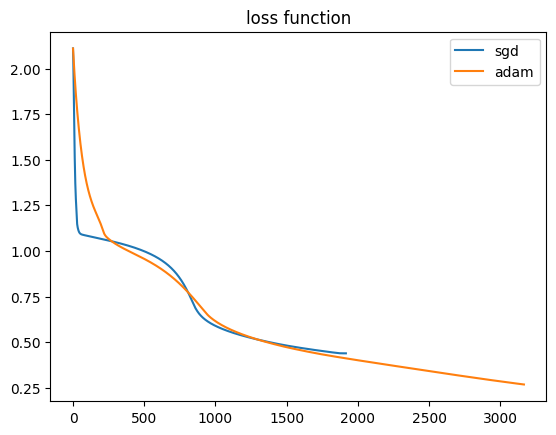

In [54]:
# Comparing the optimizers for network with 6 neurons in hiden layer
clf_lb = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(6,), random_state=123).fit(X_train, y_train)
clf_sgd = MLPClassifier(solver='sgd', max_iter=3000, learning_rate_init=0.001, learning_rate='adaptive',alpha=1e-5, hidden_layer_sizes=(6,), random_state=123).fit(X_train, y_train)
clf_adam = MLPClassifier(solver='adam', max_iter=5000, alpha=1e-5, hidden_layer_sizes=(6,), random_state=123).fit(X_train, y_train)

plt.plot(clf_sgd.loss_curve_)
plt.title('loss function')
plt.plot(clf_adam.loss_curve_)
plt.legend(['sgd','adam'])

In [55]:
#lbfgs test
y_pred = clf_lb.predict(X_test)
scores_clf_lb=metrics.accuracy_score(y_test,y_pred)

#sgd test
y_pred = clf_sgd.predict(X_test)
scores_clf_sgd=metrics.accuracy_score(y_test,y_pred)

#adam test
y_pred = clf_adam.predict(X_test)
scores_clf_adam=metrics.accuracy_score(y_test,y_pred)


print('lbfgs = ', scores_clf_lb, ";  sgd = ", scores_clf_sgd, "; adam = ", scores_clf_adam )


lbfgs =  0.9333333333333333 ;  sgd =  0.8777777777777778 ; adam =  0.9666666666666667


What is the influence of space scaling?

In [56]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_std=scaler.transform(X_train)
X_test_std=scaler.transform(X_test)


from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_mm=scaler.transform(X_train)
X_test_mm=scaler.transform(X_test)


lbfgs_mm =  0.9555555555555556 ;  sgd_mm =  0.8888888888888888 ; adam_mm =  0.9333333333333333


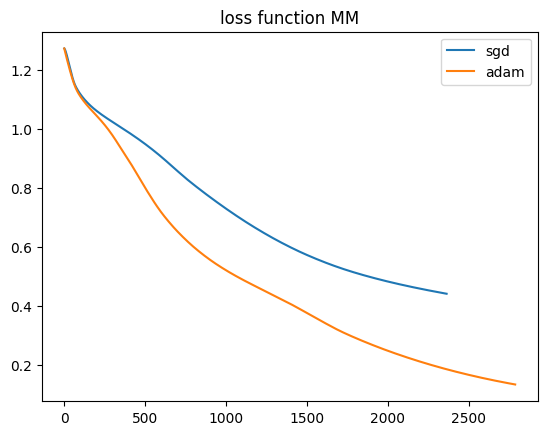

In [57]:
# Min-Max scaler
# Comparing the optimizers for network with 6 neurons in hiden layer
clf_lb = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(6,), random_state=123).fit(X_train_mm, y_train)
clf_sgd = MLPClassifier(solver='sgd', max_iter=3000, alpha=1e-5, hidden_layer_sizes=(6,), random_state=123).fit(X_train_mm, y_train)
clf_adam = MLPClassifier(solver='adam', max_iter=3000, alpha=1e-5, hidden_layer_sizes=(6,), random_state=123).fit(X_train_mm, y_train)
#lbfgs test
y_pred = clf_lb.predict(X_test_mm)
scores_clf_lb=metrics.accuracy_score(y_test,y_pred)

#sgd test
y_pred = clf_sgd.predict(X_test_mm)
scores_clf_sgd=metrics.accuracy_score(y_test,y_pred)

#adam test
y_pred = clf_adam.predict(X_test_mm)
scores_clf_adam=metrics.accuracy_score(y_test,y_pred)

plt.plot(clf_sgd.loss_curve_)
plt.title('loss function MM')
plt.plot(clf_adam.loss_curve_)
plt.legend(['sgd','adam'])

print('lbfgs_mm = ', scores_clf_lb, ";  sgd_mm = ", scores_clf_sgd, "; adam_mm = ", scores_clf_adam )

lbfgs_std =  0.9333333333333333 ;  sgd_std =  0.9333333333333333 ; adam_std =  0.9333333333333333


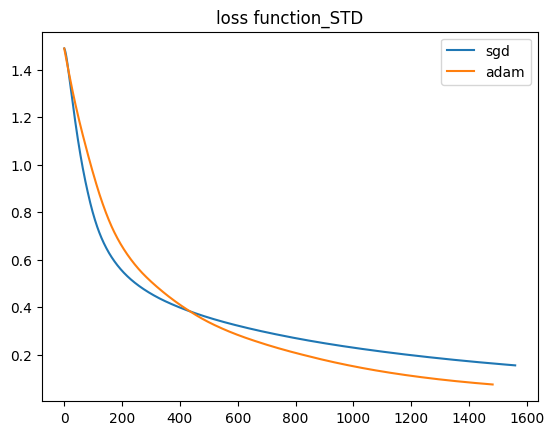

In [58]:
# Standartisation scaler
# Comparing the optimizers for network with 6 neurons in hiden layer
clf_lb = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(6,), random_state=123).fit(X_train_std, y_train)
clf_sgd = MLPClassifier(solver='sgd', max_iter=3000, alpha=1e-5, hidden_layer_sizes=(6,), random_state=123).fit(X_train_std, y_train)
clf_adam = MLPClassifier(solver='adam', max_iter=3000, alpha=1e-5, hidden_layer_sizes=(6,), random_state=123).fit(X_train_std, y_train)
#lbfgs test
y_pred = clf_lb.predict(X_test_std)
scores_clf_lb=metrics.accuracy_score(y_test,y_pred)

#sgd test
y_pred = clf_sgd.predict(X_test_std)
scores_clf_sgd=metrics.accuracy_score(y_test,y_pred)

#adam test
y_pred = clf_adam.predict(X_test_std)
scores_clf_adam=metrics.accuracy_score(y_test,y_pred)

plt.plot(clf_sgd.loss_curve_)
plt.title('loss function_STD')
plt.plot(clf_adam.loss_curve_)
plt.legend(['sgd','adam'])

print('lbfgs_std = ', scores_clf_lb, ";  sgd_std = ", scores_clf_sgd, "; adam_std = ", scores_clf_adam )

The scaling may improve the classification result.


How about neuron activation function?

In [59]:
# activation{‘identity’, ‘logistic’, ‘tanh’, ‘relu’}, default=’relu’
# Comparing the optimizers for network with 6 neurons in hiden layer
# https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html#sklearn.neural_network.MLPClassifier
clf_relu = MLPClassifier(solver='lbfgs', activation='relu', alpha=1e-5, hidden_layer_sizes=(3,), random_state=123).fit(X_train_std, y_train)
clf_logistic = MLPClassifier(solver='lbfgs', activation='logistic', alpha=1e-5, hidden_layer_sizes=(3,), random_state=123).fit(X_train_std, y_train)
clf_identity = MLPClassifier(solver='lbfgs', activation='identity', alpha=1e-5, hidden_layer_sizes=(3,), random_state=123).fit(X_train_std, y_train)
#lbfgs test
y_pred = clf_relu.predict(X_test_std)
scores_clf_relu=metrics.accuracy_score(y_test,y_pred)

#sgd test
y_pred = clf_logistic.predict(X_test_std)
scores_clf_logistic=metrics.accuracy_score(y_test,y_pred)

#adam test
y_pred = clf_identity.predict(X_test_std)
scores_clf_adam=metrics.accuracy_score(y_test,y_pred)


print('relu = ', scores_clf_relu, ";  logistic = ", scores_clf_logistic, "; identity = ", scores_clf_adam )

relu =  0.7 ;  logistic =  0.9333333333333333 ; identity =  0.9444444444444444


In [60]:
from sklearn.model_selection import GridSearchCV

#mlp_gs = MLPClassifier(max_iter=1000)
parameter_space = {
    'hidden_layer_sizes': [(3,2) ,(3,) ,(5,)],
    'activation': ['identity', 'relu', 'logistic'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}

grid = GridSearchCV(clf_logistic, parameter_space, refit = True, cv=5, verbose=3)
grid.fit(X_train_std, y_train) # X is train samples and y is the corresponding labels

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV 1/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(3, 2), learning_rate=constant;, score=1.000 total time=   0.0s
[CV 2/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(3, 2), learning_rate=constant;, score=0.917 total time=   0.0s
[CV 3/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(3, 2), learning_rate=constant;, score=0.750 total time=   0.0s
[CV 4/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(3, 2), learning_rate=constant;, score=1.000 total time=   0.0s
[CV 5/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(3, 2), learning_rate=constant;, score=0.917 total time=   0.0s
[CV 1/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(3, 2), learning_rate=adaptive;, score=1.000 total time=   0.0s
[CV 2/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(3, 2), learning_rate=adaptive;, score=0.917 total time=   0.0s
[CV 3/5] END activati

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 4/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(3, 2), learning_rate=constant;, score=1.000 total time=   0.1s
[CV 5/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(3, 2), learning_rate=constant;, score=1.000 total time=   0.1s
[CV 1/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(3, 2), learning_rate=adaptive;, score=0.917 total time=   0.0s
[CV 2/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(3, 2), learning_rate=adaptive;, score=0.917 total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 3/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(3, 2), learning_rate=adaptive;, score=1.000 total time=   0.1s
[CV 4/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(3, 2), learning_rate=adaptive;, score=1.000 total time=   0.1s
[CV 5/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(3, 2), learning_rate=adaptive;, score=1.000 total time=   0.1s
[CV 1/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(3,), learning_rate=constant;, score=1.000 total time=   0.0s
[CV 2/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(3,), learning_rate=constant;, score=0.917 total time=   0.0s
[CV 3/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(3,), learning_rate=constant;, score=1.000 total time=   0.0s
[CV 4/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(3,), learning_rate=constant;, score=1.000 total time=   0.0s
[CV 5/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(3,), learning_rate=constant;, score=1.000 total time=  

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(3, 2), learning_rate=adaptive;, score=1.000 total time=   0.1s
[CV 2/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(3, 2), learning_rate=adaptive;, score=0.917 total time=   0.1s
[CV 3/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(3, 2), learning_rate=adaptive;, score=1.000 total time=   0.0s
[CV 4/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(3, 2), learning_rate=adaptive;, score=1.000 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 5/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(3, 2), learning_rate=adaptive;, score=1.000 total time=   0.1s
[CV 1/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(3,), learning_rate=constant;, score=1.000 total time=   0.0s
[CV 2/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(3,), learning_rate=constant;, score=0.917 total time=   0.0s
[CV 3/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(3,), learning_rate=constant;, score=1.000 total time=   0.0s
[CV 4/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(3,), learning_rate=constant;, score=1.000 total time=   0.0s
[CV 5/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(3,), learning_rate=constant;, score=1.000 total time=   0.0s
[CV 1/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(3,), learning_rate=adaptive;, score=1.000 total time=   0.0s
[CV 2/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(3,), learning_rate=adaptive;, score=0.917 total time=   0.0s
[CV 3/5] END a

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 3/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(5,), learning_rate=adaptive;, score=1.000 total time=   0.1s
[CV 4/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(5,), learning_rate=adaptive;, score=1.000 total time=   0.1s
[CV 5/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(5,), learning_rate=adaptive;, score=1.000 total time=   0.1s
[CV 1/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(3, 2), learning_rate=constant;, score=1.000 total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(3, 2), learning_rate=constant;, score=0.833 total time=   0.0s
[CV 3/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(3, 2), learning_rate=constant;, score=1.000 total time=   0.0s
[CV 4/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(3, 2), learning_rate=constant;, score=1.000 total time=   0.0s
[CV 5/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(3, 2), learning_rate=constant;, score=0.917 total time=   0.0s
[CV 1/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(3, 2), learning_rate=adaptive;, score=1.000 total time=   0.0s
[CV 2/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(3, 2), learning_rate=adaptive;, score=0.833 total time=   0.0s
[CV 3/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(3, 2), learning_rate=adaptive;, score=1.000 total time=   0.0s
[CV 4/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(3, 2), learning

GridSearchCV(cv=5,
             estimator=MLPClassifier(activation='logistic', alpha=1e-05,
                                     hidden_layer_sizes=(3,), random_state=123,
                                     solver='lbfgs'),
             param_grid={'activation': ['identity', 'relu', 'logistic'],
                         'alpha': [0.0001, 0.05],
                         'hidden_layer_sizes': [(3, 2), (3,), (5,)],
                         'learning_rate': ['constant', 'adaptive']},
             verbose=3)

In [61]:

# print best parameter after tuning
print('The best modep params=', grid.best_params_)

# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

means = grid.cv_results_['mean_test_score']
stds = grid.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, grid.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))

The best modep params= {'activation': 'identity', 'alpha': 0.05, 'hidden_layer_sizes': (3, 2), 'learning_rate': 'constant'}
MLPClassifier(activation='identity', alpha=0.05, hidden_layer_sizes=(3, 2),
              random_state=123, solver='lbfgs')
0.917 (+/-0.183) for {'activation': 'identity', 'alpha': 0.0001, 'hidden_layer_sizes': (3, 2), 'learning_rate': 'constant'}
0.917 (+/-0.183) for {'activation': 'identity', 'alpha': 0.0001, 'hidden_layer_sizes': (3, 2), 'learning_rate': 'adaptive'}
0.967 (+/-0.082) for {'activation': 'identity', 'alpha': 0.0001, 'hidden_layer_sizes': (3,), 'learning_rate': 'constant'}
0.967 (+/-0.082) for {'activation': 'identity', 'alpha': 0.0001, 'hidden_layer_sizes': (3,), 'learning_rate': 'adaptive'}
0.967 (+/-0.082) for {'activation': 'identity', 'alpha': 0.0001, 'hidden_layer_sizes': (5,), 'learning_rate': 'constant'}
0.967 (+/-0.082) for {'activation': 'identity', 'alpha': 0.0001, 'hidden_layer_sizes': (5,), 'learning_rate': 'adaptive'}
0.983 (+/-0.067)

In [62]:
from sklearn.metrics import classification_report

grid_predictions = grid.predict(X_test_std)
print(grid.best_params_)
scores=metrics.accuracy_score(y_test,grid_predictions)
print('ACC = ', scores)
# print classification report
print(classification_report(y_test, grid_predictions))

{'activation': 'identity', 'alpha': 0.05, 'hidden_layer_sizes': (3, 2), 'learning_rate': 'constant'}
ACC =  0.9333333333333333
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        30
           1       0.88      0.93      0.90        30
           2       0.93      0.87      0.90        30

    accuracy                           0.93        90
   macro avg       0.93      0.93      0.93        90
weighted avg       0.93      0.93      0.93        90



In [63]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, grid_predictions))



[[30  0  0]
 [ 0 28  2]
 [ 0  4 26]]


In [64]:
import numpy as np
from sklearn.preprocessing import label_binarize
grid_predictions_prob = grid.predict_proba(X_test_std)/2

n_classes = len(set(y_test))

Y = label_binarize(y_test, classes=[*range(n_classes)])

In [65]:
#%% ROC-AUC Curve
#https://www.kaggle.com/code/muhammetvarl/mlp-multiclass-classification-roc-auc

from scipy import interp
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
# Learn to predict each class against the other


n_classes = 3 # number of class




# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(Y[:, i], grid_predictions_prob[:, i], )
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(Y.ravel(), grid_predictions_prob.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

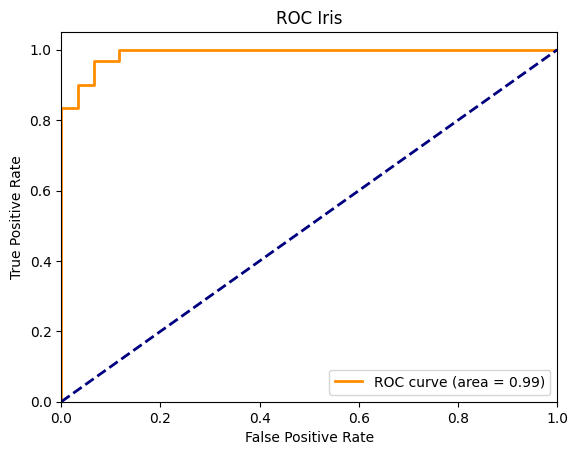

In [66]:
# The process of drawing a roc-auc curve belonging to a specific class

plt.figure()
lw = 2 # line_width
plt.plot(fpr[2], tpr[2], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[2]) # Drawing Curve according to 3. class
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Iris')
plt.legend(loc="lower right")
plt.show()

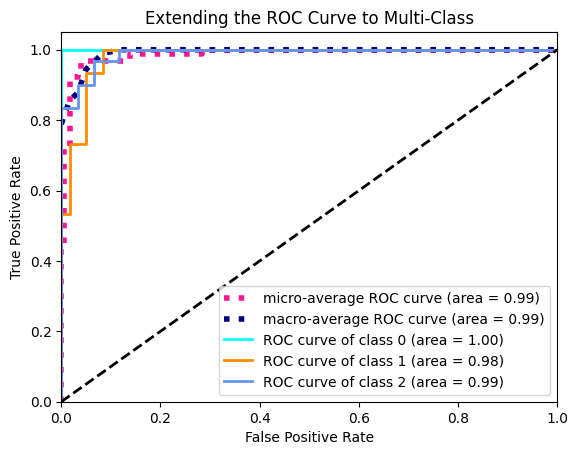

In [67]:
# Process of plotting roc-auc curve belonging to all classes.
#https://www.kaggle.com/code/muhammetvarl/mlp-multiclass-classification-roc-auc
from itertools import cycle
roc_auc_scores = []
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))
    roc_auc_scores.append(roc_auc[i])

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Extending the ROC Curve to Multi-Class')
plt.legend(loc="lower right")
plt.show()